### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [1]:
nb_fname = "IHA2_EllaGuiladi.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [2]:
NAME1 = "Ella Guiladi" 
NAME2 = ""
GROUP = ""

### Check Python version

In [3]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [4]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [5]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [6]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/JulianoLagana/deep-machine-learning/master/home-assignments/IHA2/IHA2.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset in Computer Lab 1, but on a new and very interesting dataset. We'll use the [Predict'em All dataset from Kaggle](https://www.kaggle.com/semioniy/predictemall) (download the dataset directly from Kaggle using this link). This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), with geographical coordinates, time, weather, population density, distance to pokestops/gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to Canvas must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. However, **be sure that you do the assignment using PyTorch** since we will be using it through the following assignments as well. [The python docs](https://docs.python.org/3/), [pytorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

## 0. Imports

Import any necessary modules here.

In [7]:
import torch
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from torch import nn, optim
import torch.nn.functional as F

## 1. Loading and extracting subset

The first step consists of filtering the dataset by the three pokemon you are interested at. 

Start by loading the `'300k.csv'` file using pandas. If you haven't downloaded it yet, use [this link](https://www.kaggle.com/semioniy/predictemall) to do so. 

In [8]:
data = pd.read_csv('/Users/ellaguiladi/Dropbox/Skola/CAS 2/Deep Machine Learning/Homeworks/IHA2/300k.csv',low_memory = False)

Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [9]:
df = pd.DataFrame(data, columns = ['latitude', 'longitude','class']) 

Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [10]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [11]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616></td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [12]:
print(name_dict['Diglett'])
print(name_dict['Seel'])
print(name_dict['Tauros'])

df_updated = df.loc[df['class'].isin([name_dict['Diglett'], name_dict['Seel'], name_dict['Tauros']])] 

print(df_updated)

50
86
128
         latitude   longitude  class
90      49.146199 -122.638105     50
137     44.476769  -73.212749    128
225     39.767486  -86.161068    128
550     49.999197    9.066973     86
629     25.724382 -100.379311     50
...           ...         ...    ...
294822  34.190725 -118.490821    128
294909  34.189895 -118.490000     86
295194  53.555035   -0.087039     86
295436  34.186898 -118.488905     86
295529  39.748243  -84.086557    128

[2083 rows x 3 columns]


## 2. Visualization of the dataset

The second step consists of visualizing the dataset. This will help you understand the distribution of the features and get an idea of how hard the task will be.

Plot a histogram of the number of occurrences of each class.

class
50       721
86       692
128      670
dtype: int64


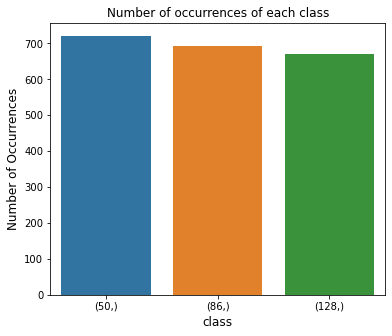

In [13]:
df_updated_temp = pd.DataFrame(df_updated,columns = ['class'])
count_class= df_updated_temp.value_counts()
print(count_class)
plt.figure(figsize=(6,5))
sns.barplot(count_class.index,count_class.values)
plt.title('Number of occurrences of each class')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('class', fontsize=12)
plt.show()

Is the dataset balanced?

**Your answer:** The dataset is not exactly balanced, but since it has approximately equally amount of data samples in each class, it can be considered to be balanced.

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

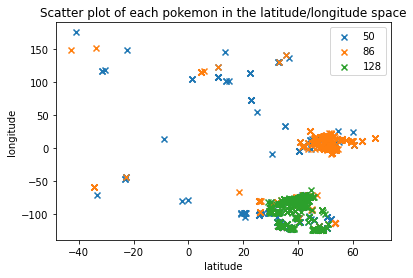

In [14]:
color = {name_dict['Diglett'] : 'b', name_dict['Seel'] : 'o',name_dict['Tauros'] : 'g'} 

for classes in color:
    df_temp =df_updated.loc[df_updated["class"].isin([classes])]
    plt.scatter(df_temp["latitude"], df_temp["longitude"], label = classes, marker="x")
    plt.xlabel('latitude')
    plt.ylabel('longitude')
    plt.title('Scatter plot of each pokemon in the latitude/longitude space')
    plt.legend(loc = 'best')

Is there any other visualization you think would be useful? If so, insert it here.

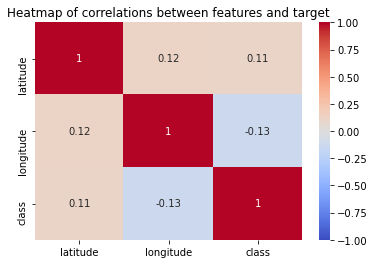

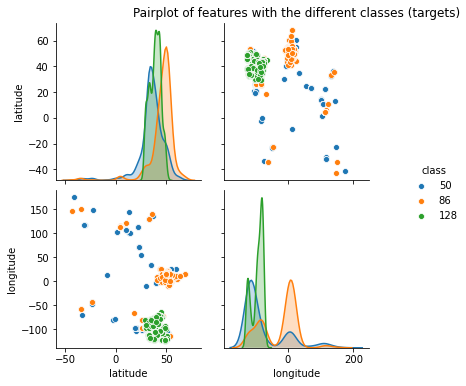

In [15]:
#An heatmap in order to see how correlated the features are.
#As well as if the features are correlated with the target, which then indicates a trivial problem.
# The resulting figure shows that there is no large correlations between features (or target).

sns.heatmap(df_updated.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title('Heatmap of correlations between features and target')
plt.show()

print('\n')


# Pairs plot allows us to see both distribution of single variables and relationships between two variables by
# using scatterplots and distributionplots. Good way to identify trends as well as which features thar are useful
# in further analysis. 

sns.pairplot(df_updated,hue = 'class')
plt.title('Pairplot of features with the different classes (targets)')
plt.show()


How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:** 
From the scatter plot it is possible to see that a major part of the classes are overlapping, i.e. the problem is not linearly separable. No one of the classes can be completely separated but the green class (Tauros) can be somewhat separated from the orange class (Seel). The blue class (Diglett) cannot be separated from either class.

Which accuracy do you expect to achieve?

**Your answer:** 
Since we have so few classes, the probability to choose one of the classes approximately 33% (since we assume that classes are balanced), which are pretty good odds. If the assumption that the "Seel" and "Tauros" pokemon are well separated classes is correct, then it might be possible to predict those classes with quite good accuracy. The "Diglett" pokemon would however be predicted randomly since it is assumed to not be separated well from the other pokemon classes. This expected accuracy should therefor result in a value that is somewhere over 50%, perhaps around 67% (since 67% corresponds to 2/3).

## 3. Preprocessing

The third step consists of processing the data before training, such as dividing the dataset into training, validation, and test sets. Some tranformations can also be applied to the dataset in order to improve the performance of the network. 

Start by creating the input and output vectors.

In [16]:
X = df_updated[['latitude', 'longitude']].values
y = df_updated['class'].values

# renaming class 50 to class 0
y=np.where(y==50, 0, y)

# renaming class 86 to class 1
y=np.where(y==86, 1, y)

# renaming class 128 to class 2
y=np.where(y==128, 2, y)

Separate your data into training (55%), validation (25%) and test sets (20%). If you wish to apply any transformation to the dataset, do it here as well. 

In [17]:
#split dataset
train_set = 0.55
validation_set = 0.25
test_set = 0.20

# train is 55% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1 - train_set, random_state=0)

# test is 20% and validation is 25% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = test_set/(test_set + validation_set),random_state=0) 

print(X_train.shape, X_val.shape, X_test.shape)

#standardize data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)
X_val= scaler.transform(X_val)

# convert datasets to tensors in order to be able to use PyTorch
X_train = torch.from_numpy(X_train).float()
y_train = torch.squeeze(torch.from_numpy(y_train).long())

X_test = torch.from_numpy(X_test).float()
y_test = torch.squeeze(torch.from_numpy(y_test).long())

X_val = torch.from_numpy(X_val).float()
y_val = torch.squeeze(torch.from_numpy(y_val).long())


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

print(y_train)


(1145, 2) (521, 2) (417, 2)
torch.Size([1145, 2]) torch.Size([1145])
torch.Size([417, 2]) torch.Size([417])
torch.Size([521, 2]) torch.Size([521])
tensor([2, 1, 0,  ..., 1, 1, 1])


## 4. Training

The fourth step is where you will choose the architecture of your network (number of hidden layers, activation functions, etc.), and train it. 

Start by choosing an architecture for your network.

In [18]:
class Net(nn.Module):
    
    def __init__(self, number_features):
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(number_features, 15)
        self.fc2 = nn.Linear(15, 3)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
    
        return x

network = Net(X_train.shape[1])

Train the network.

In [19]:
# Number of epochs, batch size, number of training data and learning rate
epochs    = 20 
lr        = 0.05

batchsize_train = 32
m_train        = len(y_train)

batchsize_val = 32
m_val        = len(y_val)

# Calculate the loss (choose CrossEntropyLoss since its useful when training a classification problem with C classes
# when the network doesnt end with a softmax function, since it takes a logits 𝐳 as input
#, not the probability vector 𝐩 and applies log softmax to the input itself.)
criterion = nn.CrossEntropyLoss()

# Optimize parameters with adam 
optimizer = optim.Adam(network.parameters(), lr)

for epoch in range(epochs):
    losses = []
    n_correct = 0
    for i in range((m_train - 1) // batchsize_train + 1):
    # Take the training data in the current minibatch
        start = i * batchsize_train
        end   = start + batchsize_train
        b_x   = X_train[start:end]
        b_y   = y_train[start:end]
        
        pred = network(b_x)
        loss = criterion(pred, b_y)
        losses.append(loss.item())
        
        # Number of correct predictions
        n_correct += (pred.argmax(dim=1) == b_y).sum().item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    train_accuracy = n_correct/len(X_train)
    train_avg_loss = sum(losses)/len(losses)    

        
    # Compute predictions in the validation set 
    losses = []
    n_correct = 0
    with torch.no_grad(): #since no backpropagation is done
        for i in range((m_val - 1) // batchsize_val + 1):
        # Take the validation data in the current minibatch
            start = i * batchsize_val
            end   = start + batchsize_val
            b_x   = X_val[start:end]
            b_y   = y_val[start:end]
            
            pred = network(b_x)
            loss = criterion(pred, b_y)
            losses.append(loss.item())
            
            n_correct += (pred.argmax(dim=1) == b_y).sum().item()
        val_accuracy = n_correct/len(X_val)
        val_avg_loss = sum(losses)/len(losses)      
        
        
    display_str = 'Epoch {}'
    display_str += '\tTrain loss: {:.3f} '
    display_str += '\tVal loss: {:.3f}'
    display_str += '\tTrain accuracy: {:.2f}'
    display_str += '\tVal accuracy: {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))

Epoch 0	Train loss: 0.868 	Val loss: 0.804	Train accuracy: 0.60	Val accuracy: 0.68
Epoch 1	Train loss: 0.750 	Val loss: 0.771	Train accuracy: 0.67	Val accuracy: 0.67
Epoch 2	Train loss: 0.731 	Val loss: 0.764	Train accuracy: 0.69	Val accuracy: 0.69
Epoch 3	Train loss: 0.721 	Val loss: 0.758	Train accuracy: 0.71	Val accuracy: 0.69
Epoch 4	Train loss: 0.717 	Val loss: 0.748	Train accuracy: 0.71	Val accuracy: 0.72
Epoch 5	Train loss: 0.712 	Val loss: 0.745	Train accuracy: 0.72	Val accuracy: 0.73
Epoch 6	Train loss: 0.707 	Val loss: 0.736	Train accuracy: 0.73	Val accuracy: 0.73
Epoch 7	Train loss: 0.704 	Val loss: 0.731	Train accuracy: 0.73	Val accuracy: 0.73
Epoch 8	Train loss: 0.698 	Val loss: 0.743	Train accuracy: 0.72	Val accuracy: 0.73
Epoch 9	Train loss: 0.695 	Val loss: 0.750	Train accuracy: 0.73	Val accuracy: 0.73
Epoch 10	Train loss: 0.695 	Val loss: 0.731	Train accuracy: 0.73	Val accuracy: 0.73
Epoch 11	Train loss: 0.689 	Val loss: 0.746	Train accuracy: 0.72	Val accuracy: 0.73
Ep

For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [20]:
n_correct=0
test_pred = network(X_test)
n_correct += (test_pred.argmax(dim=1) == y_test).sum().item()
test_accuracy = n_correct/len(X_test)
print('Test accuracy is:',round(test_accuracy,2))

Test accuracy is: 0.68


Compute the confusion matrix of your predictions on the test set.

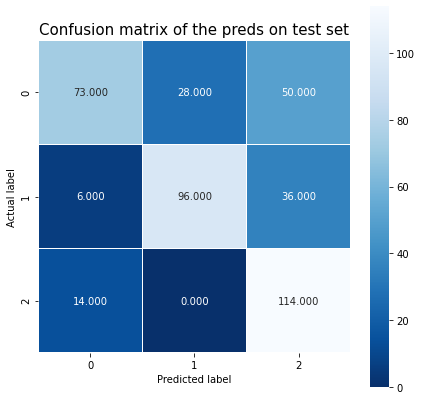

In [21]:
plt.figure(figsize=(7,7))
cm = metrics.confusion_matrix(y_test.detach().numpy(), test_pred.argmax(dim=1).detach().numpy())
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion matrix of the preds on test set'
plt.title(all_sample_title, size = 15);

What can you conclude from the computed accuracy and confusion matrix?

**Your answer:** 

- The computed accuracy of the test set lies within the expected range (i.e over 50% and around 67%), indicating that the network structure has a good architecture for the posed problem.


- From the confusion matrix, one can observe that the majority of the correctly predicted labels (labels where predicted label = actual label) correspond to class 2 and 1 (especially class 2). This was expected since class 2 corresponds to Tauros (class 128) and class 1 corresponds to Seel (class 86), which were the classes that were assumed to be able to be classified correclty since they were the most separated. Class 0, which corresponds to Diglett (class 50), has a bit less correclty predicted labels, which was expected since it was much less separated from the other classes, which was visible in the scatter plot from the exploratory data analysis. However, there were still many of the class 0 labels that was predicted correctly (almost as many as in class 1). This can later be explained by analyzing the decision boundaries, where it can be shown that class 0 occupies a much larger space than the other two classes, which increases the possibility of it to be classified correclty. 

Visualize the decision regions of the network. Overlap it with the points corresponding to the training data, such as in Section 2, by using the scatter plot function.

Hint: A simple way to do it is to generate a lot of points within a predefined range of longitude and latitude and apply your network to it. However, feel free to explore other ways.

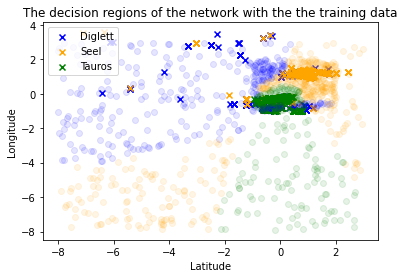

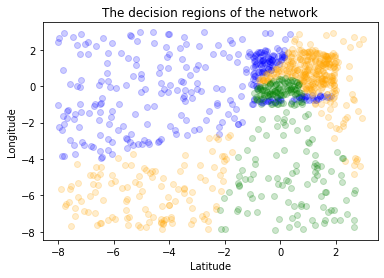

In [22]:
longitude = np.random.uniform(-1, 2, size=(1, 1000))
latitude = np.random.uniform(-8, 3, size=(1, 1000))
random_features = np.concatenate((latitude, longitude)).reshape(1000,2)

random_features = torch.from_numpy(random_features).float()

pred = network(random_features)
pred = pred.argmax(dim=1).detach().numpy()

random_features_temp= np.transpose(np.vstack((np.transpose(X_train), y_train)))

class_0 = random_features_temp[random_features_temp[:,2]==0,:]
class_1 = random_features_temp[random_features_temp[:,2]==1,:]
class_2 = random_features_temp[random_features_temp[:,2]==2,:]

fig, ax = plt.subplots()
plt.scatter(class_0[:,0] ,class_0[:,1], c='blue', label = 'Diglett',marker='x')
plt.scatter(class_1[:,0] ,class_1[:,1], c='orange', label = 'Seel',marker='x')
plt.scatter(class_2[:,0] ,class_2[:,1], c='green', label = 'Tauros',marker='x')


decision_boundary= np.transpose(np.vstack((np.transpose(random_features), pred)))
class_0db = decision_boundary[decision_boundary[:,2]==0,:]
class_1db = decision_boundary[decision_boundary[:,2]==1,:]
class_2db = decision_boundary[decision_boundary[:,2]==2,:]
plt.scatter(class_0db[:,0] ,class_0db[:,1], c='blue', alpha = 0.1)
plt.scatter(class_1db[:,0] ,class_1db[:,1], c='orange', alpha = 0.1)
plt.scatter(class_2db[:,0] ,class_2db[:,1], c='green', alpha = 0.1)
plt.legend(loc = 'best')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('The decision regions of the network with the the training data')
plt.show()


plt.scatter(class_0db[:,0] ,class_0db[:,1], c='blue', alpha = 0.2)
plt.scatter(class_1db[:,0] ,class_1db[:,1], c='orange', alpha = 0.2)
plt.scatter(class_2db[:,0] ,class_2db[:,1], c='green', alpha = 0.2)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('The decision regions of the network')
plt.show()


Do the learned decision regions look like you would expect? Please comment on your results. 

**Your answer:** 
- Possible to see from the plots with only the decision boundaries, that the yellow and green group are classified correctly since they are each in their corresponding region, while the purple is quite spread over the different regions. However, since the purple space (corresponding to "Diglett"), is much larger than the other two areas, it many of the Diglett labels are still classified correctly. Since the purple points correspond to the "Diglett" pokemon and the other two classes correspond to Seel (green), and Tauros (yellow), the decision regions looks as expected.

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Your answer:**
- From previous result in the accuracies, classification matrix as well as from the plot of the decision boundaries, it is possible to see that the network classifies the Tauros and Seel pokemon quite well. Therefor, one can draw the conclusion that the pokemons probably will be captured if one travels to a location where either Tauros or Seel exists, and where Diglett does not exist. 

Is (are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer:**
- It is hard to estimate the value of other features in forehand. However, it might be interesting to investigate features as gymDistanceKm, pressure, terrainType and temperature since the dataset consists of roughly 293,000 pokemon sightings, which might indicate that these are spread out around the world and should therefor contain different values and distributions. By plotting the histograms below and analyzing each feature, it can be concluded that the features "pressure" and "terrainType" are valuable to add as input features to the classifier in order to improve the performance. 

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

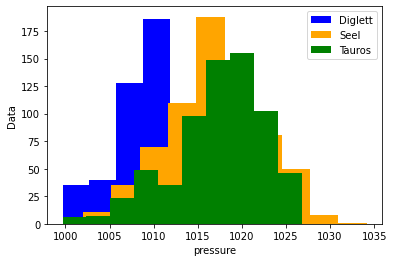

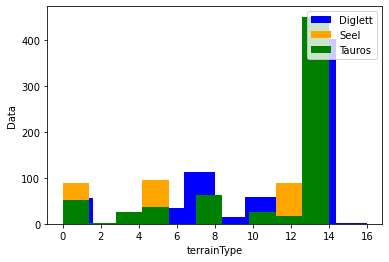

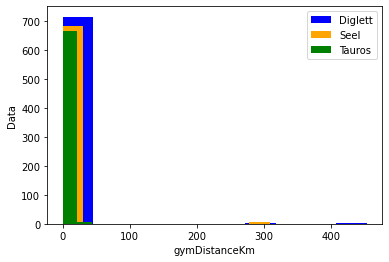

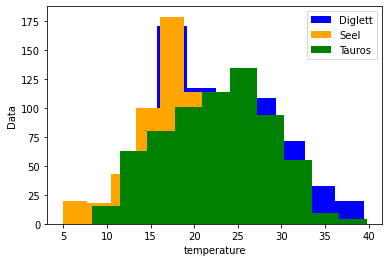

In [23]:
def histogram_plot(feature):    
    df_features = pd.DataFrame(data, columns = ['pokemonId','terrainType','temperature','gymDistanceKm','pressure','latitude', 'longitude','class']) 

    diglett_data = df_features.loc[df_features ["class"].isin([name_dict['Diglett']])]
    seel_data = df_features.loc[df_features ["class"].isin([name_dict['Seel']])]
    tauros_data = df_features.loc[df_features ["class"].isin([name_dict['Tauros']])]

    plt.hist(x = diglett_data[feature], color='blue', label = 'Diglett')
    plt.hist(x = seel_data[feature], color='orange', label = 'Seel')
    plt.hist(x = tauros_data[feature], color='green', label = 'Tauros')
    plt.xlabel(feature)
    plt.ylabel('Data')
    plt.legend(loc = 'upper right')
    plt.show()
    

histogram_plot('pressure') 
histogram_plot('terrainType') 
histogram_plot('gymDistanceKm') 
histogram_plot('temperature') 

What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

**Your answer:**
- The histograms were plotted in the same plot in order to more easily be able to compare their distributions.


- The plots of the histograms can be useful in order to see which features that are different for the three pokemons. If the distribution of the histogram of a feature is different for the pokemons, it can be beneficial to include that feature as input. This can enable the prediction to be more correct since that feature will include specific/different characteristics for the different pokemons, which can simplify the classification due to features of classes being more separable. 


- After plotting most of the features as histograms for the three pokemons, the two features with the distribution that differentiated between pokemons the most was the "pressure" and "terrainType" features. It can especicially be seen for the "pressure" feature, that it has a different distribution for the "Diglett" compared to the other two, which might enable the classification of that class to improve and thereby probably increase the accuracy. It can also be seen that the "gymDistanceKm" feature has a similar distribution for the three values and that the "temperature" feature also includes overlapping distributions between features. Therefor, these two last features will probably not be useful to add to the input. 

The purpose was this assignment was mostly to make you design a network for classification, using this Pokemon dataset as use case. However, if you want to find those three particular Pokemons, most likely using a network for classification is not the best approach. An alternative would be to perform localization by using regression instead. **Can you state some pros and cons of approach this as a regression problem instead of a classification problem?** (We do not except very detailed answers, you will pass the assignment as long as you make a reasonable attempt at explaining the pros and cons.)

**Your answer:**

Classification involves identifying class membership while regression involves predicting a response, i.e the value from a continous set. In Regression, the output variable must be continuous, while the output variable is discrete for classification. If the problem is formulated in a way that we want to localize where the three pokemons are, the problem is then real-valued since we then will predict the coordinates (longitude/latitude) of the pokemons. Then regression will be preferable, since the output variable will be a real or continuous value. Therefor, regression can be used to predict a continuous value for longitude and latitude, using the different pokemon classes as input and the features as output instead, while classification is used in order to explain and visualize probabilities of where the pokemons are likely to be found, using the coordinates (features) to obtain the most probable class.

A pro of stating this problem as a regression problem is that we will be able to predict the actual coordinates (a single point), where the probability of finding each pokemon is maximal instead of the probabilites of areas where the different one of the pokemons are more likely to be found than the others.

A con of stating the problem like this might be that using only the feature "class" might not be enough to get good predictive results with high accuracy, since it does not provide additional useful information to the regression model by itself. Therefor, probably several features will be necessary to add as input, making the regression model a more complex model than the classification model, which might increase the computational time of the training. 

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [24]:
# YOUR CODE HERE